<a href="https://colab.research.google.com/github/tutosrive/ED/blob/from_colab/src/explanations/teacher/colab/Graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Creación del código para la construcción de un grafo no dirigido, considerando aristas y vértices mediante listas de adyacencias

In [ ]:

class Vertex:
    def __init__(self, id):
        self.id = id
        self.adjacent = {}

    def add_neighbor(self, neighbor, weight=0):
        self.adjacent[neighbor] = weight

    def get_connections(self):
        return self.adjacent

    def get_id(self):
        return self.id

In [ ]:
class Graph:
    def __init__(self):
        self.vertex_list = {}
        self.num_vertex = 0

    def add_vertex(self, id):
        self.num_vertex += 1
        new_vertex = Vertex(id)
        self.vertex_list[id] = new_vertex
        return new_vertex

    def get_vertex(self, id):
        return self.vertex_list.get(id)

    def add_edge(self, from_id, to_id, weight=0):
        if from_id not in self.vertex_list:
            self.add_vertex(from_id)
        if to_id not in self.vertex_list:
            self.add_vertex(to_id)
        self.vertex_list[from_id].add_neighbor(to_id, weight)

    def get_vertices(self):
        return self.vertex_list.keys()



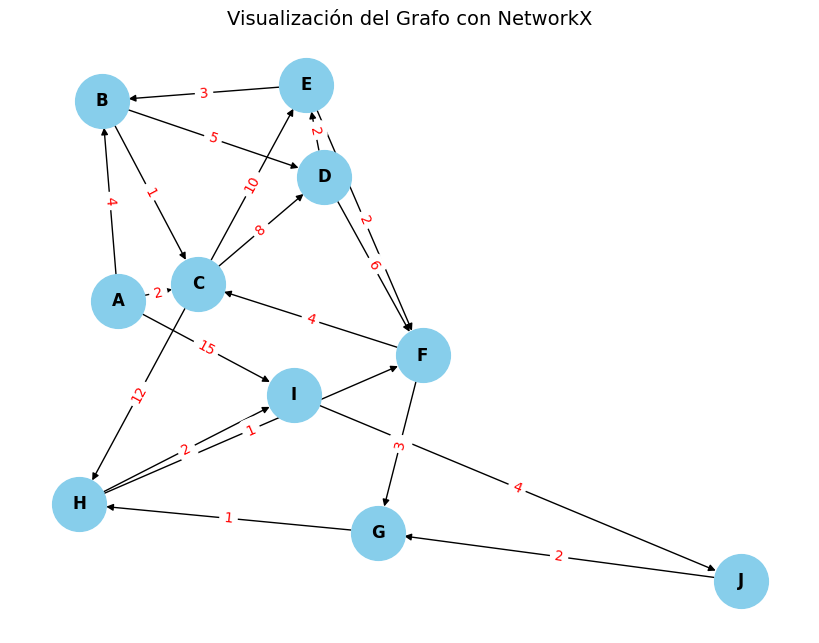

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
# === Crear y poblar el grafo ===

g = Graph()

def generateBasicGraph():
    g.add_edge('A', 'B', 2)
    g.add_edge('B', 'C', 3)
    g.add_edge('C', 'D', 1)
    g.add_edge('D', 'E', 4)
    g.add_edge('E', 'F', 2)
    g.add_edge('B', 'G', 5)
    g.add_edge('G', 'H', 2)
    g.add_edge('D', 'B', 1)  # Ejemplo de arista hacia atrás


def generateAdvancedGraph():
    # Conexiones principales (una especie de “espina dorsal”)
    g.add_edge('A', 'B', 4)
    g.add_edge('A', 'C', 2)
    g.add_edge('B', 'D', 5)
    g.add_edge('C', 'D', 8)
    g.add_edge('C', 'E', 10)
    g.add_edge('D', 'E', 2)
    g.add_edge('D', 'F', 6)
    g.add_edge('E', 'F', 2)
    g.add_edge('F', 'G', 3)

    # Caminos alternativos y retornos
    g.add_edge('B', 'C', 1)     # Atajo entre B y C
    g.add_edge('E', 'B', 3)     # Retorno hacia B
    g.add_edge('F', 'C', 4)     # Retorno medio
    g.add_edge('G', 'H', 1)
    g.add_edge('H', 'I', 2)
    g.add_edge('I', 'J', 4)
    g.add_edge('H', 'F', 1)     # Retroalimentación hacia F
    g.add_edge('J', 'G', 2)     # Cierre de ciclo G-H-I-J-G

    # Camino largo con costo bajo
    g.add_edge('A', 'I', 15)

    # Camino alternativo con peso más alto
    g.add_edge('C', 'H', 12)


#generateBasicGraph()
generateAdvancedGraph()

# === Convertir a networkx para visualizar ===

G_nx = nx.DiGraph()  # Usa DiGraph para grafo dirigido (puedes usar nx.Graph() si no lo es)

for v_id, vertex in g.vertex_list.items():
    for neighbor, weight in vertex.get_connections().items():
        G_nx.add_edge(v_id, neighbor, weight=weight)

# === Dibujar el grafo ===

pos = nx.spring_layout(G_nx, seed=42)
edge_labels = nx.get_edge_attributes(G_nx, 'weight')

plt.figure(figsize=(8, 6))
nx.draw(G_nx, pos, with_labels=True, node_color='skyblue', node_size=1500, font_size=12, font_weight='bold', arrows=True)
nx.draw_networkx_edge_labels(G_nx, pos, edge_labels=edge_labels, font_color='red')
plt.title("Visualización del Grafo con NetworkX", fontsize=14)
plt.show()

Se agrega el algoritmo de Bellman Ford para estudio:

In [ ]:
import math

def bellman_ford(graph, start_id):
    # === Inicialización de etiquetas: cada vértice con un valor de infinito, a excepción del inicial que empieza en cero. Y los predecesores de cada vértice en None ===
    dist = {v: math.inf for v in graph.get_vertices()}
    pred = {v: None for v in graph.get_vertices()}
    dist[start_id] = 0
    pred[start_id] = start_id

    print("=== Iteración inicial ===")
    for v in graph.get_vertices():
        print(f"{v}: ({'∞' if dist[v]==math.inf else dist[v]}, {pred[v]})")
    print()

    # === Iteraciones de relajación (mejorar el valor de los costos asociados a las aristas) ===
    for i in range(len(graph.get_vertices()) - 1):
        print(f"=== Iteración {i+1} ===")
        cambios = False

        for u in graph.get_vertices():
            for v, weight in graph.get_vertex(u).get_connections().items():
                # Relajación
                if dist[u] + weight < dist[v]:
                    dist[v] = dist[u] + weight
                    pred[v] = u
                    cambios = True
                    print(f"Actualizado {v}: viene de {u}, nuevo costo = {dist[v]}")

        # Mostrar etiquetas después de la iteración
        print("\nEtiquetas al final de la iteración:")
        for v in graph.get_vertices():
            costo = "∞" if dist[v] == math.inf else dist[v]
            print(f"{v}: ({costo}, {pred[v]})")
        print()

        # Si no hubo cambios, detenemos el algoritmo
        if not cambios:
            print("No hubo cambios en esta iteración. El algoritmo se detiene.\n")
            break

    # === Detección de ciclos negativos (opcional para cuando hay valores de aristas negativos que harán que cada iteración cambie ese valor porque siempre va a dar uno menor al actual) ===
    for u in graph.get_vertices():
        for v, weight in graph.get_vertex(u).get_connections().items():
            if dist[u] + weight < dist[v]:
                print("Se detectó un ciclo negativo en el grafo.")
                return None, None

    print("=== Resultado final ===")
    for v in graph.get_vertices():
        costo = "∞" if dist[v] == math.inf else dist[v]
        print(f"{v}: costo = {costo}, predecesor = {pred[v]}")

    return dist, pred

Se prueba el algoritmo de Bellman Ford y se imprime el resultado

=== Iteración inicial ===
A: (0, A)
B: (∞, None)
C: (∞, None)
D: (∞, None)
E: (∞, None)
F: (∞, None)
G: (∞, None)
H: (∞, None)
I: (∞, None)
J: (∞, None)

=== Iteración 1 ===
Actualizado B: viene de A, nuevo costo = 4
Actualizado C: viene de A, nuevo costo = 2
Actualizado I: viene de A, nuevo costo = 15
Actualizado D: viene de B, nuevo costo = 9
Actualizado E: viene de C, nuevo costo = 12
Actualizado H: viene de C, nuevo costo = 14
Actualizado E: viene de D, nuevo costo = 11
Actualizado F: viene de D, nuevo costo = 15
Actualizado F: viene de E, nuevo costo = 13
Actualizado G: viene de F, nuevo costo = 16
Actualizado J: viene de I, nuevo costo = 19

Etiquetas al final de la iteración:
A: (0, A)
B: (4, A)
C: (2, A)
D: (9, B)
E: (11, D)
F: (13, E)
G: (16, F)
H: (14, C)
I: (15, A)
J: (19, I)

=== Iteración 2 ===

Etiquetas al final de la iteración:
A: (0, A)
B: (4, A)
C: (2, A)
D: (9, B)
E: (11, D)
F: (13, E)
G: (16, F)
H: (14, C)
I: (15, A)
J: (19, I)

No hubo cambios en esta iteración. El

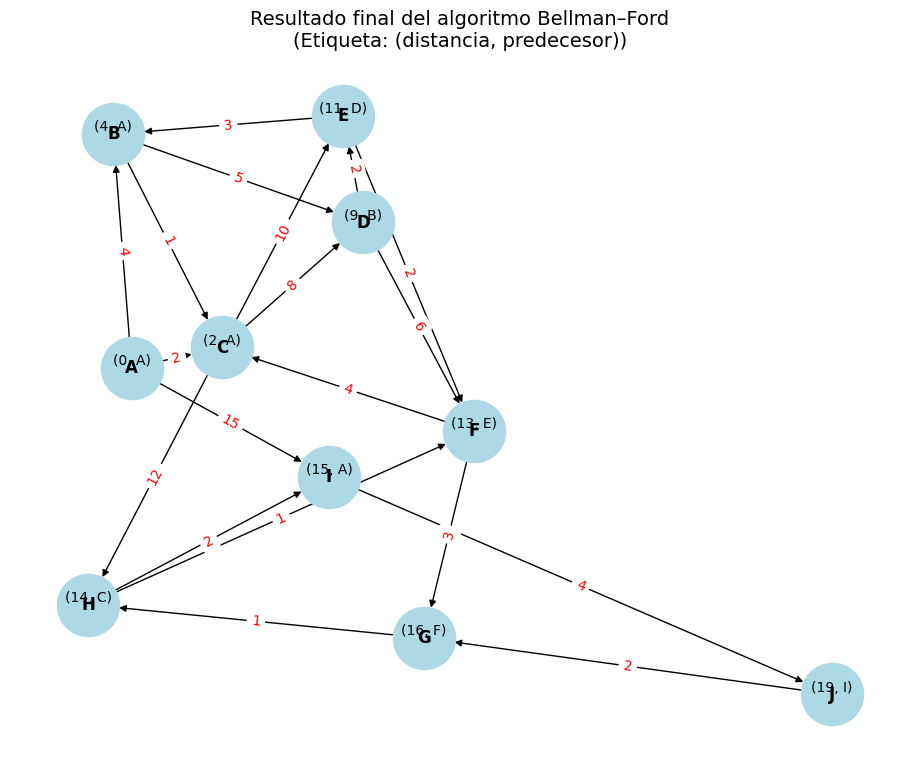

In [ ]:

# === Ejecutar Bellman-Ford desde A ===
dist, pred = bellman_ford(g, 'A')

# === Convertir a NetworkX para visualizar ===
G_nx = nx.DiGraph()

for v_id, vertex in g.vertex_list.items():
    for neighbor, weight in vertex.get_connections().items():
        G_nx.add_edge(v_id, neighbor, weight=weight)

# === Crear etiquetas para cada nodo: (distancia, predecesor) ===
labels_nodes = {}
for v in g.get_vertices():
    costo = "∞" if dist[v] == math.inf else dist[v]
    predecesor = pred[v] if pred[v] else "-"
    labels_nodes[v] = f"({costo}, {predecesor})"

# === Crear etiquetas para las aristas (pesos) ===
edge_labels = nx.get_edge_attributes(G_nx, 'weight')

# === Dibujar ===
pos = nx.spring_layout(G_nx, seed=42)
plt.figure(figsize=(9, 7))
nx.draw(G_nx, pos,
        with_labels=True,
        node_color='lightblue',
        node_size=2000,
        font_size=12,
        font_weight='bold',
        arrows=True)

# Etiquetas de las aristas (pesos)
nx.draw_networkx_edge_labels(G_nx, pos, edge_labels=edge_labels, font_color='red')

# Etiquetas de las distancias y predecesores
nx.draw_networkx_labels(G_nx, pos, labels=labels_nodes,
                        font_size=10, font_color='black',
                        verticalalignment='bottom')

plt.title("Resultado final del algoritmo Bellman–Ford\n(Etiqueta: (distancia, predecesor))", fontsize=14)
plt.show()

Se define el algoritmo de Dijkstra

In [ ]:
import heapq
import math

# === Algoritmo de Dijkstra ===
def dijkstra(graph, start_id):
    dist = {v: math.inf for v in graph.get_vertices()}
    pred = {v: None for v in graph.get_vertices()}
    dist[start_id] = 0
    pred[start_id] = start_id

    pq = [(0, start_id)]  # (distancia acumulada, vértice)
    visitados = set()

    print("=== Iteración inicial ===")
    for v in graph.get_vertices():
        print(f"{v}: ({'∞' if dist[v]==math.inf else dist[v]}, {pred[v]})")
    print()

    while pq:
        d_actual, u = heapq.heappop(pq)
        if u in visitados:
            continue
        visitados.add(u)

        print(f"Procesando vértice {u} con distancia {d_actual}")
        for v, peso in graph.get_vertex(u).get_connections().items():
            if v not in visitados:
                nueva_dist = dist[u] + peso
                if nueva_dist < dist[v]:
                    dist[v] = nueva_dist
                    pred[v] = u
                    heapq.heappush(pq, (nueva_dist, v))
                    print(f"  Actualizado {v}: viene de {u}, nuevo costo = {nueva_dist}")

        # Mostrar etiquetas tras procesar cada vértice
        print("\nEtiquetas actuales:")
        for v in graph.get_vertices():
            costo = "∞" if dist[v] == math.inf else dist[v]
            print(f"{v}: ({costo}, {pred[v]})")
        print()

    print("=== Resultado final ===")
    for v in graph.get_vertices():
        costo = "∞" if dist[v] == math.inf else dist[v]
        print(f"{v}: costo = {costo}, predecesor = {pred[v]}")

    return dist, pred


Se prueba el algoritmo de Dijkstra

=== Iteración inicial ===
A: (0, A)
B: (∞, None)
C: (∞, None)
D: (∞, None)
E: (∞, None)
F: (∞, None)
G: (∞, None)
H: (∞, None)
I: (∞, None)
J: (∞, None)

Procesando vértice A con distancia 0
  Actualizado B: viene de A, nuevo costo = 4
  Actualizado C: viene de A, nuevo costo = 2
  Actualizado I: viene de A, nuevo costo = 15

Etiquetas actuales:
A: (0, A)
B: (4, A)
C: (2, A)
D: (∞, None)
E: (∞, None)
F: (∞, None)
G: (∞, None)
H: (∞, None)
I: (15, A)
J: (∞, None)

Procesando vértice C con distancia 2
  Actualizado D: viene de C, nuevo costo = 10
  Actualizado E: viene de C, nuevo costo = 12
  Actualizado H: viene de C, nuevo costo = 14

Etiquetas actuales:
A: (0, A)
B: (4, A)
C: (2, A)
D: (10, C)
E: (12, C)
F: (∞, None)
G: (∞, None)
H: (14, C)
I: (15, A)
J: (∞, None)

Procesando vértice B con distancia 4
  Actualizado D: viene de B, nuevo costo = 9

Etiquetas actuales:
A: (0, A)
B: (4, A)
C: (2, A)
D: (9, B)
E: (12, C)
F: (∞, None)
G: (∞, None)
H: (14, C)
I: (15, A)
J: (∞, None)

Proces

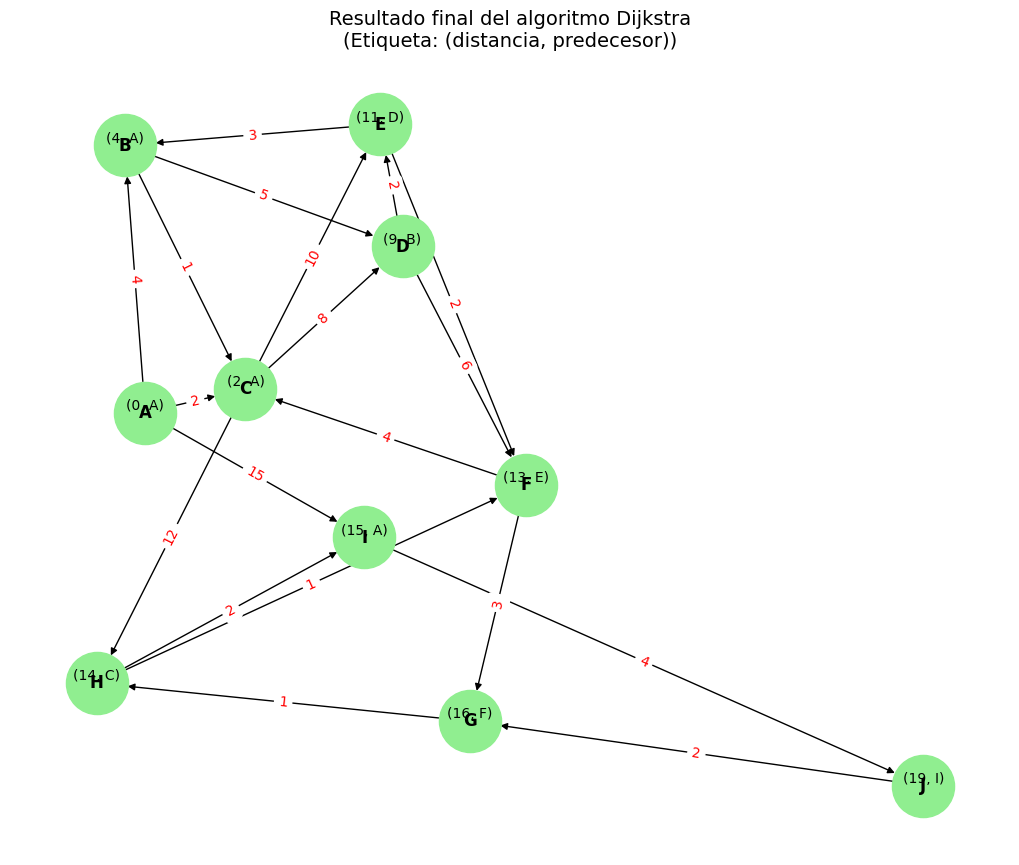

In [ ]:

import networkx as nx
import matplotlib.pyplot as plt

# === Ejecutar Dijkstra desde A ===
dist, pred = dijkstra(g, 'A')

# === Convertir a NetworkX para visualizar ===
G_nx = nx.DiGraph()

for v_id, vertex in g.vertex_list.items():
    for neighbor, weight in vertex.get_connections().items():
        G_nx.add_edge(v_id, neighbor, weight=weight)

# === Crear etiquetas para cada nodo: (distancia, predecesor) ===
labels_nodes = {}
for v in g.get_vertices():
    costo = "∞" if dist[v] == math.inf else dist[v]
    predecesor = pred[v] if pred[v] else "-"
    labels_nodes[v] = f"({costo}, {predecesor})"

# === Crear etiquetas para las aristas (pesos) ===
edge_labels = nx.get_edge_attributes(G_nx, 'weight')

# === Dibujar el grafo ===
pos = nx.spring_layout(G_nx, seed=42)
plt.figure(figsize=(10, 8))
nx.draw(G_nx, pos,
        with_labels=True,
        node_color='lightgreen',
        node_size=2000,
        font_size=12,
        font_weight='bold',
        arrows=True)
nx.draw_networkx_edge_labels(G_nx, pos, edge_labels=edge_labels, font_color='red')
nx.draw_networkx_labels(G_nx, pos, labels=labels_nodes,
                        font_size=10, font_color='black',
                        verticalalignment='bottom')

plt.title("Resultado final del algoritmo Dijkstra\n(Etiqueta: (distancia, predecesor))", fontsize=14)
plt.show()